# Infos

source
- https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/
- https://openweathermap.org/

# import packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import requests, json 

# import API Key

In [2]:
with open ("api_key/api_key.txt", "r") as myfile:
    data=myfile.readlines()
api_key = data[0]

# Call API

In [3]:
# Enter your API key here 
#api_key = "yourkey"
  
# base_url variable to store url 
base_url =  "http://api.openweathermap.org/data/2.5/forecast?"
# Give city name 
city_name = 'Berlin,de'
complete_url = base_url + "appid=" + api_key + "&q=" + city_name 
  
# get method of requests module 
# return response object 
response = requests.get(complete_url) 
  
# json method of response object  
x = response.json() 

# Format result

In [4]:
y=x['list']

In [5]:
weather_data=[]
for i in range(len(y)):
    weather_data.append([x['list'][i]['dt_txt'],
                         x['list'][i]['main']['temp'],
                         x['list'][i]['main']['humidity'],
                         x['list'][i]['wind']['speed'],
                         x['list'][i]['wind']['deg'],
                         x['list'][i]['weather'][0]['main']
                        ])
                         

df_weather=pd.DataFrame(weather_data,columns=['datetime','temp','humidity','wind_speed','wind_dir','weather'])
df_weather.set_index(pd.to_datetime(df_weather.datetime),inplace=True)
df_weather.drop('datetime',axis=1,inplace=True)
#kelvin to degree
df_weather['temp']=df_weather['temp']-273.15

In [6]:
df_weather.head()

,temp,humidity,wind_speed,wind_dir,weather
datetime,,,,,
2019-12-13 15:00:00,1.58,77,3.53,134,Clouds
2019-12-13 18:00:00,0.82,83,3.07,149,Clouds
2019-12-13 21:00:00,0.91,87,2.51,156,Clouds
2019-12-14 00:00:00,2.09,94,2.65,205,Clouds
2019-12-14 03:00:00,2.95,97,3.15,257,Rain


# Plot

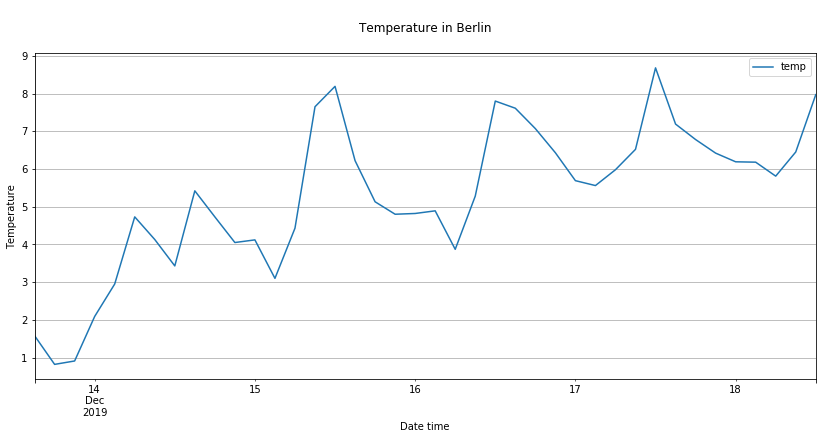

In [7]:
if True:
    plt.figure(figsize=(14,6))
    df_weather['temp'].plot()
    plt.xlabel('Date time')
    plt.ylabel('Temperature')
    plt.title('\nTemperature in Berlin\n')
    plt.grid()
    plt.legend()
    plt.show()